<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_07_M%C3%A1quinas_de_Soporte_para_regresi%C3%B3n_(SVR)_temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Construir y evaluar un modelo de regresión basado en el algoritmo de máquinas de soporte vectorial (SVM).

# Marco conceptual

El modelo de máquinas de soporte vectorial *(SVM, por sus siglas en inglés "Support Vector Machines")* son un conjunto de métodos de aprendizaje supervisado utilizados para clasificación, regresión y detección de outliers.

Se puede implementar eficazmente para problemas de regresión, en lo que se conoce como SVM de regresión o *SVR ("Support Vector Regression")*.

En el contexto de la regresión, el objetivo es predecir un valor continuo o un valor numérico a partir de una o varias variables independientes.

En el modelo, se busca construir un hiperplano que no solo separe los datos, sino que lo haga con el mayor margen posible. Sin embargo, dado que se trata con regresión, este "margen" se refiere al rango de error tolerable especificado por ε (epsilon).

El margen de error tolerable $ϵ$ epsilon puede dejarse como 0.1 puede modificarse dependiendo del analista, de los datos y de las métricas establecidas. Al crear el modelo el valor de error $ϵ$ por default es 0.1, sin embargo, dejar el valor de ϵ por defecto en 0.1 al entrenar un modelo SVR con la lbibliouteca *scikit-learn* en Python.

Si no se especifica explícitamente un valor para el parámetro epsilon al crear la instancia de SVR, *scikit-learn* automáticamente utilizará el valor por defecto de 0.1.

Dejar ϵ en su valor por defecto es completamente aceptable durante las etapas iniciales de modelado y puede dar una buena base sobre la cual iterar.

Sin embargo, si se busca optimizar el rendimiento de un modelo SVR, podría ser bueno experimentar con diferentes valores de ϵ para ver cómo afecta a la precisión de las predicciones y a la capacidad de generalización del modelo.

Por lo pronto se puede hcaer experimentando con 0.1, 0.2, 0.5, entre otros los valores de ϵ y seleccionar el que resulte en el mejor rendimiento del modelo según las métricas que se establezcan.

De manera general el modelo de SVR ofrece ventajas y desventajas:

## Ventajas de SVR:

* Capacidad para manejar datos no lineales.
* Flexibilidad para modelar complejas relaciones subyacentes a través de la selección de kernels.
* Eficaz en espacios de alta dimensión.

## Desventajas de SVR:

* La selección de parámetros puede ser complicada y requiere cuidadosa validación cruzada.
* Puede ser computacionalmente intensivo, especialmente con grandes volúmenes de datos.

## Tipos de kernel

Los modelos de SVM pueden ser de varios tipos de acuerdo a su kernel: lineal, polinomial radial entre otros:

### Para un kernel lineal:

Para calcular prediciones bajo kernel lineal sería: SVR busca encontrar una función $f(x) = w \cdot x_i + b$
para todos los datos de entrenamiento que tenga a lo sumo una desviación en las predicciones ϵ de los valores reales. Al mismo tiempo sea lo más plana posible. Matemáticamente, la función $f(x)=⟨w,x⟩+b \therefore$   
* $w$ es el vector de pesos,
* $x_i$ son las características de entrada y
* b es el término de sesgo o intercepción.

La fórmula se utilizará para calcular las predicciones, entonces en un modelo de SVR de tipo lineal lo que se necesita son los pesos $w$ el valor de la intersección $b$.

Para calcular predicciones en el odelo SVR de tio lineal sería:

$$
f(x) = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + w_k \cdot x_k + \text{b o coeficiente intersección}
$$


# Contexto de los datos

Este caso al igual que los Casos 03, Caso 04 y Caso 05, los datos que se utiizan son simulados y se relacionan con distintaas variables atmosféricas que afecan a una temperatura de una región o localización geográfica.

## Las variables independientes:

* 1. Mes (mes): Afecta debido a las variaciones estacionales. No se considera en el modelo
* 2. Día (dia): Puede influir ligeramente debido al cambio gradual de las temperaturas a lo largo del mes. No se considera en el modelo.
* 3. Velocidad del viento (velocidad_viento): Velocidades más altas pueden reducir la sensación térmica. km/hr
* 4. Presión atmosférica (presion_atmosferica): Cambios en la presión pueden indicar cambios en el clima. hpa
* 5. Humedad relativa (humedad_relativa): Afecta la sensación térmica y puede influir en la temperatura real.
* 6. Presencia de frentes fríos (frentes_frios): Un indicador binario (0 o 1) para la presencia de un frente frío.
* 7. Latitud (latitud): Afecta la temperatura promedio, con temperaturas generalmente disminuyendo al alejarse del ecuador.
* 8. Longitud (longitud): Puede tener un efecto indirecto, especialmente en grandes países donde el clima varía de costa a costa.
* 9. Altitud (altitud): La temperatura tiende a disminuir con la altitud debido a la baja densidad del aire y la disminución de la presión atmosférica.
* 10. Radiación Solar (radiacion_solar): La cantidad de radiación solar que llega a la superficie terrestre tiene un impacto directo en la temperatura. Esta variable puede variar según la cobertura de nubes, la hora del día y la época del año. 100 a 1000 W/m^2
* 11. Luminosidad o Insolación (luminosidad): Estrechamente relacionada con la radiación solar, se refiere a la cantidad de luz solar que llega a la Tierra. Afecta la temperatura especialmente durante las horas diurnas. Soleado obscuro de 0 a 100
* 12. Contaminación o Calidad del Aire (contaminacion): Partículas y gases en la atmósfera pueden atrapar el calor, contribuyendo al efecto invernadero y, por ende, a temperaturas más altas en áreas urbanas o industrializadas. Variables como el nivel de dióxido de carbono o la presencia de ozono cerca de la superficie pueden ser indicadores de contaminación. Niveles de 0 a 500, niveles altos son peligrosos.
* 13. Cobertura de Nubes (cobertura_nubes): La cantidad de nubes en el cielo puede influir en la temperatura al bloquear la radiación solar directa durante el día y atrapar el calor durante la noche. Porcentaje de 0 a 100%

## La variable dependiente

* Temperatura ambiental es la cantidad de grados centígrados promedio.

# Descripción

* Se cargan librerías
* Se cargan funciones
* Se cargan widgest
* Se cargan los datos
* Se observa un diagrama de serie de tiempo con als fechas y temperatuas promedio por mes
* Se observa un diagrama de correlación entre variables independientes.
* Se observan los datos los primero y ultimos 20 registros de conjunto de datos
* Se hacen datos de entrenamieto y datos de validación
* Se construye el modelo con los datos de entrenamiento
  * Modelo SVR con kernel lineal
  * Modelo SVR con kernel polinomial
  * Modelo SVR con kernel radial
* Se hacen predicciones con los datos de validación
* Se evalúa el *r squared*
* Se evalúa el modelo con *RMSE root mean square error* que significa las predicciones que tanto se alejan de las realidades.
* Se hace una prediccón con un nuevo registro.
* Se interpreta el caso

## Métricas del modelo

* El modelo se acepta si el valor de *r squared* está por encima del 50%*.
* El valor de *RMSE* se comparará con otros modelos.


  * Con el modelo de regresión múltiple; estadístico RMSE de 5.35; r squared aproximado del 30%; https://colab.research.google.com/drive/1bV87TeRbxCEt1LrM565oQ6a84aSDPACF?usp=sharing
  * Con el modelo árbol de regresión con profunidad = 3; RMSE 5.58; r squared aproximadamente 24%; https://colab.research.google.com/drive/1sn8CGl4yGHI6YrjhAJZkdCdSVCoWAmFb?usp=sharing

  * Con el modelo de *random forest* con 300 árboles; *RMSE* de 5.28; *r squared* es aproximadamente de 32%; https://colab.research.google.com/drive/1sn8CGl4yGHI6YrjhAJZkdCdSVCoWAmFb?usp=sharing
  * Modelo polinomial multivariable de grado 2: Root Mean Squared Error RMSE: 5.25; r squared: 0.33; la prediccón de temperatura fué de 17.55.
  * Modelo polinomial multivariable de gado. 3: Root Mean Squared Error RMSE: 5.45; Coeficiente de Determinación ( r2 ) r squared: 0.28; la prediccón de temperatura fué de 17.44. https://colab.research.google.com/drive/1GMNVORLoU35KXXUGev6gkPddKXIVDFdR?usp=sharing





# Desarrollo



## Cargar librerías


In [302]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

import time # Para medir el tiempo de ejecucón

# Para árboles de regresión
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split

# Para random Forest
# from sklearn.ensemble import RandomForestRegressor

# from sklearn.tree import DecisionTreeRegressor, plot_tree # Para visualiar árbol
# from sklearn.tree import export_text # Para reglas de asociación


# Para modelo polinomial

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split # Para partir datos en datos entrenamieto y datos validación

# Para modelo de SVR
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split # Para partir datos en datos entrenamieto y datos validación

# Para escalar datos
from sklearn.preprocessing import StandardScaler

from sklearn import metrics # Para determinar métricas.
from sklearn.metrics import mean_squared_error, r2_score

# Para determinar estadísticos ...
import statsmodels.api as sm

## Cargar funciones



In [303]:
def f_ver_temperaturas (fechas, temperaturas):
    # Crear un DataFrame con las fechas y temperaturas
    df = pd.DataFrame({'fecha': fechas, 'temperatura': temperaturas})

    # Asegurarse de que 'fecha' es un tipo datetime
    df['fecha'] = pd.to_datetime(df['fecha'])

    # Establecer 'fecha' como el índice del DataFrame
    df.set_index('fecha', inplace=True)

    # Agrupar por mes y año, y calcular la temperatura promedio
    df_resampled = df.resample('M').mean()

    # Crear la visualización
    plt.figure(figsize=(12, 6))
    plt.plot(df_resampled.index, df_resampled['temperatura'], marker='o', linestyle='-', color='b')
    plt.title('Temperatura promedio diario mensual por Año')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura Promedio (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def f_matriz_correlacion_variables(datos):
  # Calcular la matriz de correlación
  corr_matrix = datos.corr()

  # Visualizar la matriz de correlación
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, fmt=".2f")
  plt.show()

# Esta función regresa los valores de los Coeficientes
# El intercept_0 es el coeficiene de intersección y el resto
# son los 8 coeficiene de las 8 variables predictoras del 0 al 7 por ser un arreglo
def f_coeficientes_modelo (modelo):
  return modelo.intercept_, modelo.coef_[0], modelo.coef_[1], modelo.coef_[2], modelo.coef_[3], modelo.coef_[4], modelo.coef_[5], modelo.coef_[6], modelo.coef_[7]

# funci´pn para ayudar a los hiperplanso, npumero de rengloes en la matriz de visualizaciones
def f_ajustar_y_dividir(numero):
  # Verificar si el número es impar (non)
  if numero % 2 != 0:
    numero += 1  # Hacerlo par incrementándolo en 1
  return numero / 2  # Dividir el número resultante entre 2 y retornarlo

# Función que deuelve interpretaciones con base en el valor w de acuerdo al hiperplano lineal
def f_interpretar_relacion(w, nombres_variables, dependiente):
    interpretaciones = []  # Inicializar una lista vacía para almacenar las interpretaciones

    for i, coef in enumerate(w):
        if coef > 0:
            interpretacion = "La relación entre la variable independiente " + nombres_variables[i] + " y la dependiente es ascendente. Cuando aumenta " + nombres_variables[i] + ", aumenta la variable " + dependiente
        elif coef < 0:
            interpretacion = "La relación entre la variable independiente " + nombres_variables[i] + " y la dependiente es descendente. Cuando aumenta " + nombres_variables[i] + ", disminuye la variable " + dependiente
        else:
            interpretacion = "La variable independiente " + nombres_variables[i] + " no tiene una relación lineal clara con la variable "+ dependiente
        interpretaciones.append(interpretacion)  # Añadir la interpretación actual a la lista de interpretaciones

    return interpretaciones  # Devolver la lista completa de interpretaciones


def f_hiperplanos_lineal_svr(w, b, error, nombres_variables, datos_escalados):
  # Ajustar el número de filas para los gráficos
  num_variables = len(nombres_variables)
  renglones = int(f_ajustar_y_dividir(num_variables))
  columnas = 2 if num_variables > 1 else 1

  # Configura la matriz de visualizaciones para hiperplanos debe ser cuadrada
  fig, axs = plt.subplots(renglones, 2, figsize=(15, 9))
  if renglones * columnas == 1:
    axs = np.array([axs]) # Asegurarse de que axs sea iterable

  for i, nombre_var in enumerate(nombres_variables):
     # Dibujando hiperplanos
    x_values = datos_escalados[nombre_var]
    y_hyperplano = w[0,i] * x_values + b
    y_margen_superior = y_hyperplano + error
    y_margen_inferior = y_hyperplano - error

    # Encontrar el índice de la subfigura actual
    fila = i // columnas
    columna = i % columnas

    axs[fila, columna].plot(x_values, y_hyperplano, 'r', label=f'Hiperplano para {nombre_var}')
    axs[fila, columna].plot(x_values, y_margen_superior, 'b--', label='Margen superior')
    axs[fila, columna].plot(x_values, y_margen_inferior, 'b--', label='Margen inferior')
    axs[fila, columna].set_xlabel(nombre_var)
    axs[fila, columna].set_ylabel('y')
    axs[fila, columna].legend()

  # Esconder gráficos vacíos si los hay
  for j in range(i + 1, renglones * columnas):
    fila = j // columnas
    columna = j % columnas
    axs[fila, columna].axis('off')

  plt.tight_layout()
  plt.show()

## Cargar widgests



In [304]:
# Crear un widget de salida
visualizar = widgets.Output()


# Función para actualizar y mostrar el contenido dinámicamente en el widget de salida
def f_visualizar_datos(datos1, datos2, titulo1, titulo2):
    with visualizar:
        #global titulo1, titulo2
        #titulo1 = "Primeros 20 registros de datos"
        visualizar.clear_output(wait=True)  # Limpiar el contenido anterior
        display(HTML(f"<h2>{titulo1}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos1)

        #titulo2 = "Últimos 20 registros de datos"
        display(HTML(f"<h2>{titulo2}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos2)

## Cargar datos



In [305]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/main/datos/temperaturas.csv")

# Llamar a la función para mostrar datos de entrenamiento ordenados por índice
f_visualizar_datos(datos.head(20), datos.tail(20), "Primeros registros de Datos", "Últimos registros de Datos")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Serie de datos temperturas

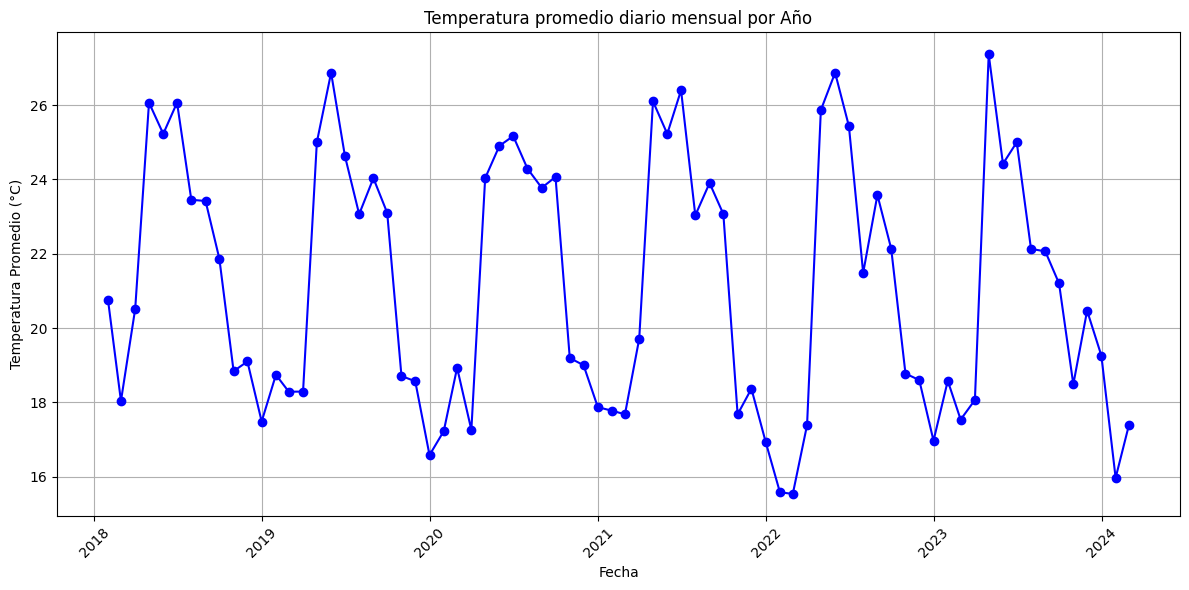

In [306]:
f_ver_temperaturas(datos['fecha'], datos['temperatura'])

## Matriz de correlación de las variables predictoras

Cuando hay mucha correlación lineal entre variables predictoras se considera que una variabe afecta a la otra por lo que es posible tomar la decisión de no considerar en el modelo alguna de ellas, finalmente se interpreta que una variable independiente afecta a otra variable independiente y ambas afectan a una variable dependiente.

En el caso de estas variables no hay correlaciones muy fuertes entre las variables independientes o predictoras.

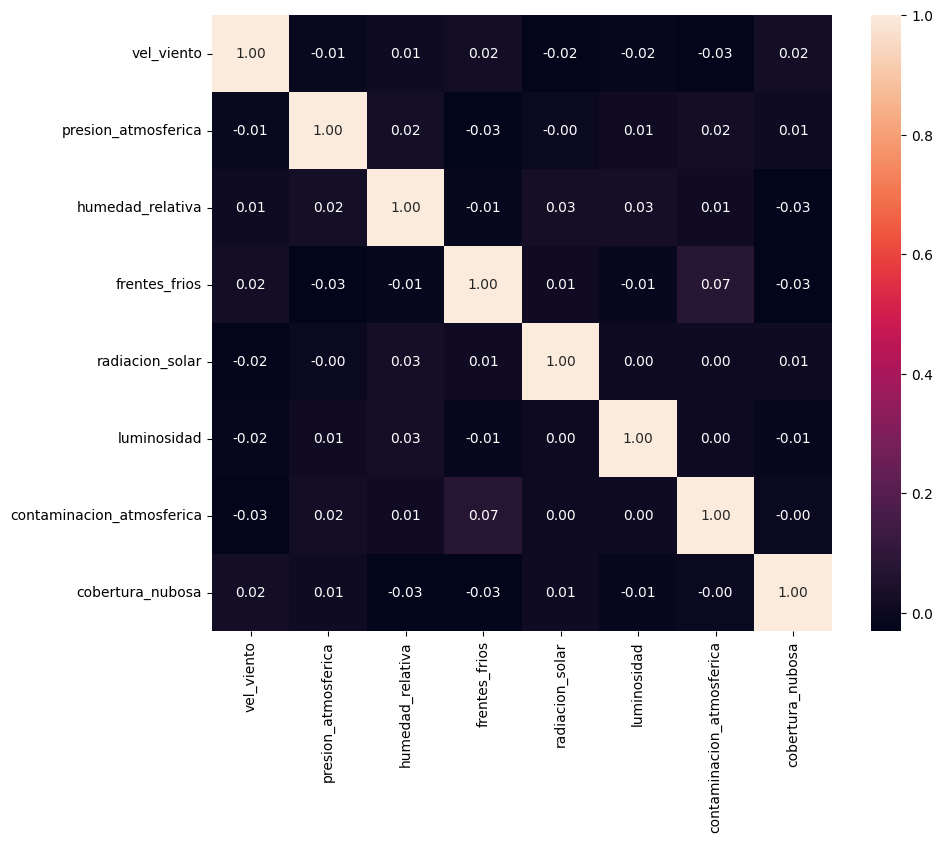

In [307]:
# Variables independientes excepto fecha y temperatura
variables_predictoras = datos.drop(columns=['fecha', 'temperatura'])
f_matriz_correlacion_variables(variables_predictoras)

## Escalar los datos

Se escalan los datos excepto temperatura

¿Qué significa escalar?

$$
escala = \frac{x_i - \bar{x}} { \sigma}
$$

* $x_i$ Cada valor observado de la variable de interés.
* $\bar{x}$ La media de todos los valores observados de la variable de interés.
* $\sigma$ La desviación estándar de todos los valores observados de la variable de interés.

Los datos originales se escalan todas las variables independiente con la función *escalar.fit_transform()* de una instancia de la función *StandardScaler()* y de la librería *StandardScaler*.

Porqué escalar los datos, el modelo de *(SVR) Support Vector Regression* sugiere que se trabajen con datos escalados dado que resulta ser más eficiente el modelo al momento de construir los hiperplanos, además evita sesgos por datos distorsionados y ayuda a la estabilidad numérica entre otras cosas.

In [308]:

# Escalar las características con StandardScaler
# Crear instancia de StandardScaler
escalar = StandardScaler()

# Escalar las características excluyendo 'temperatura'
datos_escalados = datos.drop(columns=['fecha', 'temperatura'])

datos_escalados = escalar.fit_transform(datos_escalados)

# print (datos_escalados)

# Nombres de columnas para dejar los mismos nombres que original sin fecha ni temperatura
nombres_variables = ['vel_viento', 'presion_atmosferica', 'humedad_relativa', 'frentes_frios', 'radiacion_solar', 'luminosidad', 'contaminacion_atmosferica', 'cobertura_nubosa']

# Convertir de nuevo a DataFrame y asignar los nombres de las columnas
datos_escalados = pd.DataFrame(datos_escalados, columns=nombres_variables)

# Añadir la columna 'temperatura' del DataFrame original
datos_escalados['temperatura'] = datos['temperatura']

# print (datos_escalados)

# Llamar a la función para mostrar datos de entrenamiento ordenados por índice
f_visualizar_datos(datos_escalados.head(20), datos_escalados.tail(20), "Primeros registros escalados", "Últimos registros escalados")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Crear datos de entrenamiento y validación

Los datos de entrenamiento son el 70% de los datos originales escalados y los datos de validación son el 30%.

Con los datos de entrenamiento se construye el modelo SVR.

Con los datos de validación se hacen predicciones y se evaluá el modelo.

In [309]:
# Preparar los datos para el modelo
X = datos_escalados.drop(columns=['temperatura'])  # Solo dejar las variables independientes o predictoras
y = datos_escalados['temperatura']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba o validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

f_visualizar_datos(X_train.sort_index().head(20), X_test.sort_index().head(20),
                   "Primeros registros. Datos de entrenamiento", "Primeros registros. Datos de validación")

# Para mostrar el widget de salida
display(visualizar)

Output()

Hasta aquí todo igual que los anteriores modelos de regresión multivariable construídos excepto que se trata de datos escalados.

## Construir el modelo

### Modelo de máquinas de soporte de regresión (SVR) lineal

Al crear el modelo lineal el valor de error por default es 0.1, sin embargo, dejar el valor de ϵ por defecto en 0.1 al entrenar un modelo *SVR* con *scikit-learn*.

Si no se especifica explícitamente un valor para el parámetro epsilon al crear la instancia de *SVR*, *scikit-learn* automáticamente utilizará el valor por defecto de 0.1.

Este valor suele ser un buen punto de partida para muchos problemas de regresión, pero es importante recordar que la elección óptima de ϵ puede variar dependiendo de la naturaleza específica de los datos y del problema que se  esté tratando de resolver.

Dejar ϵ en su valor por defecto es completamente aceptable durante las etapas iniciales de modelado y puede dar una buena base sobre la cual iterar.

Sin embargo, si se busca optimizar el rendimiento de un modelo *SVR*, podría ser bueno experimentar con diferentes valores de ϵ para ver cómo afecta a la precisión de las predicciones y a la capacidad de generalización del modelo.

Por lo pronto se puede haCer experimentando con 0.1, 0.2, 0.5, entre otros los valores de ϵ y seleccionar el que resulte en el mejor rendimiento del modelo según las métricas que se establezcan.


In [310]:
# Entrenar el modelo SVR con kernel lineal
error = 0.1 # Puede modifirse a gusto del analista investigador a 0.2, 0.5, 0.9 ...

# Marcar el tiempo de inicio
start_time = time.time()

modelo = SVR(kernel='linear', epsilon=error)
modelo.fit(X_train, y_train)

# Marcar el tiempo de finalización
end_time = time.time()

# Calcular la duración restando el tiempo de inicio del tiempo de finalización
duration = end_time - start_time

print(f"El tiempo de ejecución fue de {duration} segundos.")

El tiempo de ejecución fue de 0.2393958568572998 segundos.


El tiempo para construir el modelo de *SVR* puede ser una desventaja en este tipo de algoritmos de regresión cuando los daos no están escaldos, razón por la cual es necesario escalar los datos para hacer más eficiente el trabajo computacional del modelo.

### Coeficientes del modelo

Para calcular predicciones en el modelo SVR de tipo lineal sería:

$$
f(x) = Y = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + w_k \cdot x_k + \text{b o coeficiente intersección}
$$

Se identifican los valores $w_1, w_2, w_3, w_k$ y sustituyendo los valores $w_1, w_2, w_3, ...w_k$ en la fórmula:

$$
f(x) = Y = (-1.5763 \cdot x_1) + (1.0979 \cdot x_2) + (1.0248 \cdot x_3) + (-2.1215 \cdot x_4) + (1.0826\cdot x_5) + (1.0753\cdot x_6) + (1.0264\cdot x_7) + (-0.4372\cdot x_8) + (20.8888) \therefore
$$


* $w_1 \text { para } x_1; \text{vel_viento	}$
* $w_2 \text { para } x_2; \text{presion_atmosferica}$
* $w_3 \text { para } x_3; \text {humedad_relativa}$
* $w_4 \text { para } x_4; \text {frentes_frios	}$
* $w_5 \text { para } x_5; \text {radiacion_solar}$
* $w_6 \text { para } x_6; \text {luminosidad	}$
* $w_7 \text { para } x_7; \text {contaminacion_atmosferica}$
* $w_3 \text { para } x_3; \text {cobertura_nubosa}$

Los coeficientes $(w_i$) representan el peso o la importancia que el modelo asigna a cada variable independiente en la predicción de $Y$. El término
20.88882913 al final de la ecuación es el término de intersección $b$, que ajusta la línea de predicción en el eje $Y$.


In [311]:
w = modelo.coef_
b = modelo.intercept_
print ("w's= ", w)
print ("b =", b)

#
w1 = w[0,0] # vel_viento
w2 = w[0,1] # presion_atmosferica
w3 = w[0,2] # humedad_relativa
w4 = w[0,3] # frentes_frios
w5 = w[0,4] # radiacion_solar
w6 = w[0,5] # luminosidad
w7 = w[0,6] # contaminacion_atmosferica
w8 = w[0,7] # cobertura_nubosa

print ("w1 =", w1)
print ("w2 = ", w2)
print ("w3 = ", w3)
print ("w4 = ", w4)
print ("w5 = ", w5)
print ("w6 = ", w6)
print ("w7 = ", w7)
print ("w8 = ", w8)

w's=  [[-1.57633556  1.0979064   1.02488082 -2.12153469  1.0826486   1.07536456
   1.02646286 -0.4372291 ]]
b = [20.88882913]
w1 = -1.5763355607578053
w2 =  1.0979063994695801
w3 =  1.0248808158205385
w4 =  -2.1215346939960877
w5 =  1.082648596482433
w6 =  1.075364555252746
w7 =  1.0264628625284988
w8 =  -0.43722909675468846


### Hiperplano para las variable independientes

Con la llamada de la función *f_hiperplanos_lineal_svr()*

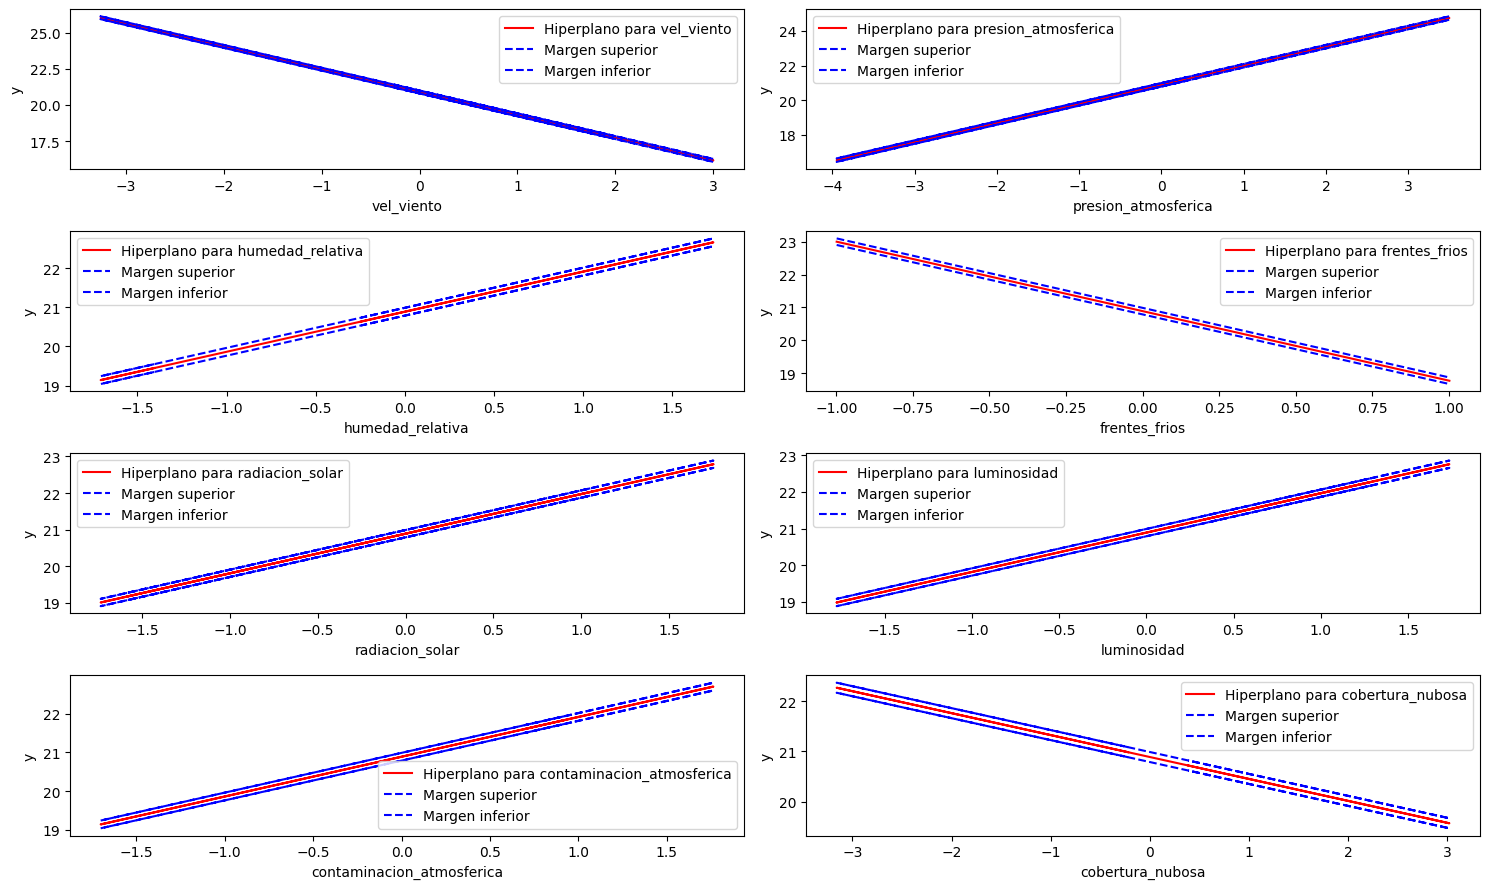

In [312]:
f_hiperplanos_lineal_svr(w, b, error, nombres_variables, datos_escalados)

Las visualizaciones con la linea roja que sería elhiperplano representa la relación modelo-prediccón entre la variable independiente (por ejemplo, vel_viento, presion_atmosferica, entre otras) y la variable dependiente temperatura $Y$.

Los vectores líneas azules reresentan los límites dentro de los cuales los errores de predicción son aceptables para el modelo y no contribuyen a la función de pérdida. Los puntos de datos que caen dentro de este margen no afectan la construcción del hiperplano.





### Significado de hiperplanos y vectores



In [313]:
# Interpretación del modelo
interpretaciones = f_interpretar_relacion(w[0], nombres_variables, 'temperatura')

# Imprimir las interpretaciones
for interpretacion in interpretaciones:
    print(interpretacion)

La relación entre la variable independiente vel_viento y la dependiente es descendente. Cuando aumenta vel_viento, disminuye la variable temperatura
La relación entre la variable independiente presion_atmosferica y la dependiente es ascendente. Cuando aumenta presion_atmosferica, aumenta la variable temperatura
La relación entre la variable independiente humedad_relativa y la dependiente es ascendente. Cuando aumenta humedad_relativa, aumenta la variable temperatura
La relación entre la variable independiente frentes_frios y la dependiente es descendente. Cuando aumenta frentes_frios, disminuye la variable temperatura
La relación entre la variable independiente radiacion_solar y la dependiente es ascendente. Cuando aumenta radiacion_solar, aumenta la variable temperatura
La relación entre la variable independiente luminosidad y la dependiente es ascendente. Cuando aumenta luminosidad, aumenta la variable temperatura
La relación entre la variable independiente contaminacion_atmosferica 

### Evaluación del modelo



In [314]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular MSE, RMSE, y R^2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Modelo SVR lineal con valor de error  ", error)
print()
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

Modelo SVR lineal con valor de error   0.1

MSE: 29.088895835464882
RMSE: 5.3934122627020535
R^2: 0.2933581384478192


### Prediccón con nuevo registro



In [315]:
# Valores de un nuevo registro

v_vel_viento = 38 # x1
v_presion_atmosferica = 950 # x2
v_humedad_relativa = 80     # x3
v_frentes_frios = 0         # x4
v_radiacion_solar = 350     # x5
v_luminosidad = 50          # x6
v_contaminacion_atmosferica = 150  # x7
v_cobertura_nubosa = 20 # x8

nuevo_registro = np.array([[v_vel_viento,
                   v_presion_atmosferica,
                   v_humedad_relativa,
                   v_frentes_frios,
                   v_radiacion_solar,
                   v_luminosidad,
                   v_contaminacion_atmosferica,
                   v_cobertura_nubosa]])

# Asumiendo que 'modelo' está ya entrenado y 'nuevo_registro' es l array de NumPy para la predicción
nombres_variables = ['vel_viento', 'presion_atmosferica', 'humedad_relativa', 'frentes_frios', 'radiacion_solar', 'luminosidad', 'contaminacion_atmosferica', 'cobertura_nubosa']

# Crear un DataFrame con los nombres de las columnas adecuados
nuevo_registro_df = pd.DataFrame(nuevo_registro, columns=nombres_variables)

nuevo_registro_escalado = escalar.transform(nuevo_registro_df)

nuevo_registro_escalado = pd.DataFrame(nuevo_registro_escalado, columns=nombres_variables)

# Hacer la predicción con el modelo SVR
# Asumiendo que 'modelo' es el modelo SVR entrenado
prediccion_temperatura = modelo.predict(nuevo_registro_escalado)

# se muestra la predicción
print ("Modelo de SVR de kernel lineal con un valor de error epsilon", error, " ", "\n")
print("Predicción con registro nuevo:", prediccion_temperatura)

Modelo de SVR de kernel lineal con un valor de error epsilon 0.1   

Predicción con registro nuevo: [20.3391677]


 La precisión de la predicción depende de la calidad del modelo *(SVR)*, la cual está influenciada por la calidad y la representatividad de los datos de entrenamiento, así como por la elección de hiperparámetros y el proceso de ajuste del modelo durante el entrenamiento, los valores de los coeficientes $w$ , el valor de $b$ y por supuesto que es de tipo lineal.

# Interpretación del caso

Al haber elaborado este caso con la cosntrucción de un modelo de regresión bajo el algoritmo de modelo de soporte para regresión (*SVR*) de tipo lineal, al modificar el valor de $ϵ$ o el error en la construccón del modelo que puede ser 0.2 o 0.5; los valores w y los estadísticos son similares, el valor más significativo pudiera ser el aumento del valor de *r squared*.

* Con el modelo de regresión múltiple; estadístico *RMSE de 5.35*; *r squared aproximado del 30%*; https://colab.research.google.com/drive/1bV87TeRbxCEt1LrM565oQ6a84aSDPACF?usp=sharing

* Con el modelo árbol de regresión con profunidad = 3; *RMSE 5.58*; *r squared aproximadamente 24%*; https://colab.research.google.com/drive/1sn8CGl4yGHI6YrjhAJZkdCdSVCoWAmFb?usp=sharing

* Con el modelo de random forest con 300 árboles; *RMSE de 5.28*; *r squared es aproximadamente de 32%*; https://colab.research.google.com/drive/1sn8CGl4yGHI6YrjhAJZkdCdSVCoWAmFb?usp=sharing

* Modelo polinomial multivariable de grado 2: *Root Mean Squared Error RMSE*: 5.25; r squared: 0.33; la prediccón de temperatura fué de 17.55.

* Modelo polinomial multivariable de gado. 3: *Root Mean Squared Error RMSE: 5.45*; Coeficiente de Determinación ( r2 ) *r squared*: 0.28; la prediccón de temperatura fué de 17.44. https://colab.research.google.com/drive/1GMNVORLoU35KXXUGev6gkPddKXIVDFdR?usp=sharing

* Este modelo de regresión utilizando máquinas de soporte *(SVR)* lineal con valor de error de 0.1; arroja los estadísticos para comparación: *RMSE: 5.39*; * r squared: 0.29* que significa que las variables explican aproximadamente el 29% a la variable temperatura; la prediccón de temperatura con valores del nuevo registro es de aproximadamente *20.33 grados*

* Este modelo de regresión utilizando máquinas de soporte *(SVR)* lineal con valor de error de 0.2; arroja los estadísticos para comparación: *RMSE: 5.39*; * r squared: 0.29* que significa que las variables explican aproximadamente el 29% a la variable temperatura; la prediccón de temperatura con valores del nuevo registro es de aproximadamente *20 grados*.

* Este modelo de regresión utilizando máquinas de soporte *(SVR)* lineal con valor de error de 0.5; arroja los estadísticos para comparación: *RMSE: 5.38*; * r squared: 0.29* que significa que las variables explican aproximadamente el 29% a la variable temperatura; la prediccón de temperatura con valores del nuevo registro es de aproximadamente *20 grados*.

* Este modelo de regresión utilizando máquinas de soporte *(SVR)* lineal con valor de error de 0.9; arroja los estadísticos para comparación: *RMSE: 5.36*; * r squared: 0.30* que significa que las variables explican aproximadamente el 30% a la variable temperatura; la prediccón de temperatura con valores del nuevo registro es de aproximadamente *20 grados*

Con lo anterior modelo que es más eficiente en las predicciones es el modelo **polinomial multivariable de grado 2**.